In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


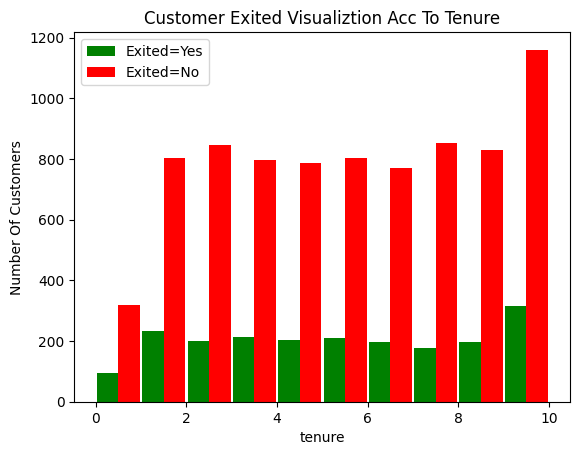

In [8]:
tenure_exited = df[df.Exited==1].Tenure
tenure_not_exited = df[df.Exited==0].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Visualiztion Acc To Tenure")
plt.hist([tenure_exited, tenure_not_exited], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

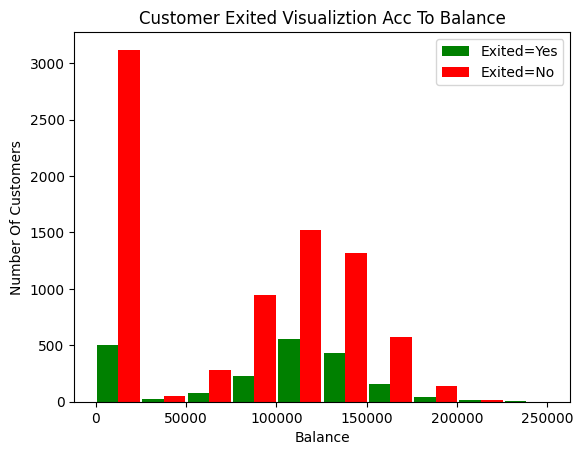

In [9]:
bc_exited = df[df.Exited==1].Balance      
bc_exited_no = df[df.Exited==0].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Visualiztion Acc To Balance")

plt.hist([bc_exited, bc_exited_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [12]:
df.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

In [13]:
dummies = pd.get_dummies(df['Geography'],drop_first=True,dtype=int)

In [14]:
df = pd.concat([df,dummies],axis=1)

In [15]:
df = df.drop('Geography',axis=1)

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [18]:
X = df.drop('Exited',axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(11,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.6543 - loss: 0.6104
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.7963 - loss: 0.4794
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.7892 - loss: 0.4736
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8025 - loss: 0.4480
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.7945 - loss: 0.4580
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.8080 - loss: 0.4367
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.8161 - loss: 0.4291
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8180 - loss: 0.4154
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8196 - loss: 0.4135
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8199 - loss: 0.4104
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8208 - loss: 0.4063
Epoch 12/100
250/250 

In [20]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8551 - loss: 0.3426


[0.33841344714164734, 0.8619999885559082]

In [21]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.04454789],
       [0.02213833],
       [0.17230424],
       [0.17833775],
       [0.06925765]], dtype=float32)

In [22]:
y_pred = []
for value in yp:
    if value > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [23]:
from sklearn.metrics import confusion_matrix as cm, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.70      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



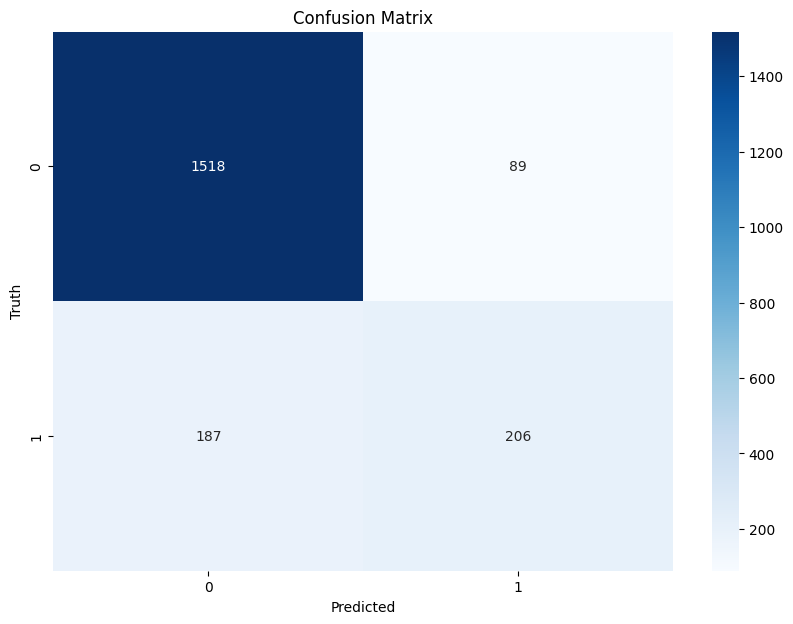

In [24]:
import seaborn as sns

cm = cm(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# Updated Added Extra Code

In [38]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=11, activation='relu'),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

# Mitigating Skewdness of Data

### Method 1: Undersampling

In [31]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [32]:
count_class_0, count_class_1 = df['Exited'].value_counts()

df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]

In [35]:
df_0 = df_class_0.sample(count_class_1)
df_final = pd.concat([df_class_1,df_0],axis=0)

df_final.Exited.value_counts()

Exited
1    2037
0    2037
Name: count, dtype: int64

In [36]:
X = df_final.drop('Exited',axis=1)
y = df_final['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [39]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5199 - loss: 0.6999
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5918 - loss: 0.6728
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6327 - loss: 0.6597
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6709 - loss: 0.6449
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6707 - loss: 0.6352
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6720 - loss: 0.6215
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6969 - loss: 0.6036
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6781 - loss: 0.6076
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6829 - loss: 0.6001
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6944 - loss: 0.5912
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6937 - loss: 0.5862
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━

### Method2: Oversampling

In [40]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [41]:
count_class_0, count_class_1 = df['Exited'].value_counts()

df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]

In [43]:
df_1 = df_class_1.sample(count_class_0, replace= True)
df_final = pd.concat([df_class_0,df_1],axis=0)

df_final.Exited.value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

In [45]:
X = df_final.drop('Exited',axis=1)
y = df_final['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [46]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5533 - loss: 0.6800
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6569 - loss: 0.6376
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7042 - loss: 0.6018
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7171 - loss: 0.5825
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7276 - loss: 0.5684
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7336 - loss: 0.5561
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7450 - loss: 0.5373
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7553 - loss: 0.5194
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7598 - loss: 0.5123
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7601 - loss: 0.5080
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7589 - loss: 0.5070
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━

### Method3: SMOTE

In [47]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [51]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5647 - loss: 0.6709
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6702 - loss: 0.6112
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.6923 - loss: 0.5880
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7129 - loss: 0.5692
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7270 - loss: 0.5476
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7387 - loss: 0.5391
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7401 - loss: 0.5236
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7372 - loss: 0.5261
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7427 - loss: 0.5119
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7449 - loss: 0.5085
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7548 - loss: 0.5015
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━

### Method4: Use of Ensemble with undersampling

In [54]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [56]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

model1 --> class1(1630) + class0(0, 1630)

model2 --> class1(1630) + class0(1631, 3262)

model3 --> class1(1630) + class0(3262, 4893)

model4 --> class1(1630) + class0(4893, 6370)

In [58]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [60]:
df2_class0 = df2[df2.Exited==0]
df2_class1 = df2[df2.Exited==1]

In [61]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [63]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5271 - loss: 0.6889
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5376 - loss: 0.6845
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5948 - loss: 0.6773
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6417 - loss: 0.6598
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6514 - loss: 0.6380
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6511 - loss: 0.6310
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6798 - loss: 0.6134
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6680 - loss: 0.6147
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6804 - loss: 0.6090
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6716 - loss: 0.6087
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6877 - loss: 0.5902
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: